In [ ]:
"""
Day 20 Challenge

Pull the data from the worldcities table in the world.db database 
to the pandas DataFrame, then answer the following questions:
    (1) Using a Matplotlib histogram, visualize the distribution of population 
        across all cities. What do you observe?
    (2) Create a bar chart with the population of the top 10 most populated
        countries. Which country is most populated?

Stretch Questions
    (1) What is the most populated city Dot visited in the last three weeks?
    (2) What is the difference in population between the most populated city 
        and the least populated city?

Revision History
    Tonnicca Gelacio, 2022-04-30 : Created
    Tonnicca Gelacio, 2022-04-30 : Code Updated
    Tonnicca Gelacio, 2022-05-01 : Code Updated
    Tonnicca Gelacio, 2022-05-04 : Edited comments and added output
"""

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import sqlite3

# connect to database
conn = sqlite3.connect("db/world.db")

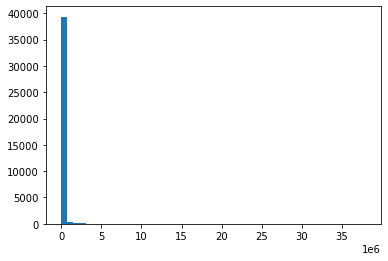

In [2]:
##### Question 1 #####

# set-up query
query = "SELECT * FROM worldcities;"
result = pd.read_sql_query(query, conn)

# plot data
plt.figure()
plt.hist(result['population'], bins = 50)
plt.ticklabel_format(axis="x", style="sci", scilimits=(6,6))
plt.show()

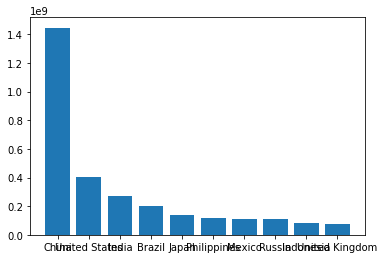

In [6]:
##### Question 2 #####

# set-up query
query = "SELECT city_ascii as 'City', country as 'Country', population as 'Population' FROM worldcities;"
result = pd.read_sql_query(query, conn)

# group by country then get total population
grouped = result.groupby(['Country'])[['Population']].sum()

# get top 10 most populated countries, sort desc
mostPopulatedCountries = grouped.sort_values('Population', ascending=False).head(10)

barData = {}

# set-up data for bar graph
for i in range(len(mostPopulatedCountries)):
    barData[mostPopulatedCountries.index[i]] = int(mostPopulatedCountries.iloc[i,0])

# set-up graph
plt.figure()
plt.bar(x = barData.keys(), height = barData.values())
plt.show()


In [4]:
citiesVisited = ['Vancouver', 'Toronto', 'Munich', 'London', 'Barcelona', 'Paris', 'Florence', 'Dubai', 'Perth', 'Melbourne', 'Tokyo', 'Bangkok', 'Honolulu', 'Seattle']

cityPopulation = {} 

for city in citiesVisited:

    # retrieve population from database
    query = "SELECT city_ascii, population FROM worldcities WHERE city_ascii = '" + city + "';"
    result = pd.read_sql_query(query, conn)

    # save result to cityPopulation
    cityPopulation[city] = int(result.iloc[0,1])

##### Stretch Question 1 #####

# get most populated city using max()
mostPopulated = max(cityPopulation, key=cityPopulation.get)

##### Stretch Question 2 #####

# get least populated city using min()
leastPopulated = min(cityPopulation, key=cityPopulation.get)

# compute difference between most populated and least populated cities
populationDifference = cityPopulation[mostPopulated] - cityPopulation[leastPopulated]

# print result
print(f'The most populated city Dot has visited is {mostPopulated} with a population of {cityPopulation[mostPopulated]:,}.')

print(f'The difference in population between the most populated city ({mostPopulated}) and the least populated city ({leastPopulated}) is {populationDifference:,}.')


The most populated city Dot has visited is Tokyo with a population of 37,977,000.
The difference in population between the most populated city (Tokyo) and the least populated city (Florence) is 37,596,052.


In [ ]:
"""
OUTPUT

(1) Visualize the distribution of population across all cities. What do you observe?
    Majority of the cities have a population smaller than 1 million.
(2) Which country is most populated? China

Stretch Questions:
The most populated city Dot has visited is Tokyo with a population of 37,977,000.
The difference in population between the most populated city (Tokyo) and the least populated city (Florence) is 37,596,052.
"""

In [ ]:
"""
NOTES
(1) For the stretch questions, no specific city has been mentioned when Dot visited New Zealand and Nepal so both countries have been excluded from computations.
"""